## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There are 2 csv files in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/satellite.mat.csv
/kaggle/input/satimage-2.mat.csv


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/satellite.mat.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# satellite.mat.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/satellite.mat.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'satellite.mat.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 38 columns


Let's take a quick look at what the data looks like:

In [7]:
df1.head(5)

,ID,V0,V1,V2,V3,V4,V5,V6,V7,V8,...,V27,V28,V29,V30,V31,V32,V33,V34,V35,Y
0,0,92,115,120,94,84,102,106,79,84,...,104,88,121,128,100,84,107,113,87,0
1,1,84,102,106,79,84,102,102,83,80,...,100,84,107,113,87,84,99,104,79,0
2,2,84,102,102,83,80,102,102,79,84,...,87,84,99,104,79,84,99,104,79,0
3,3,80,102,102,79,84,94,102,79,80,...,79,84,99,104,79,84,103,104,79,0
4,4,84,94,102,79,80,94,98,76,80,...,79,84,103,104,79,79,107,109,87,0


Distribution graphs (histogram/bar graph) of sampled columns:

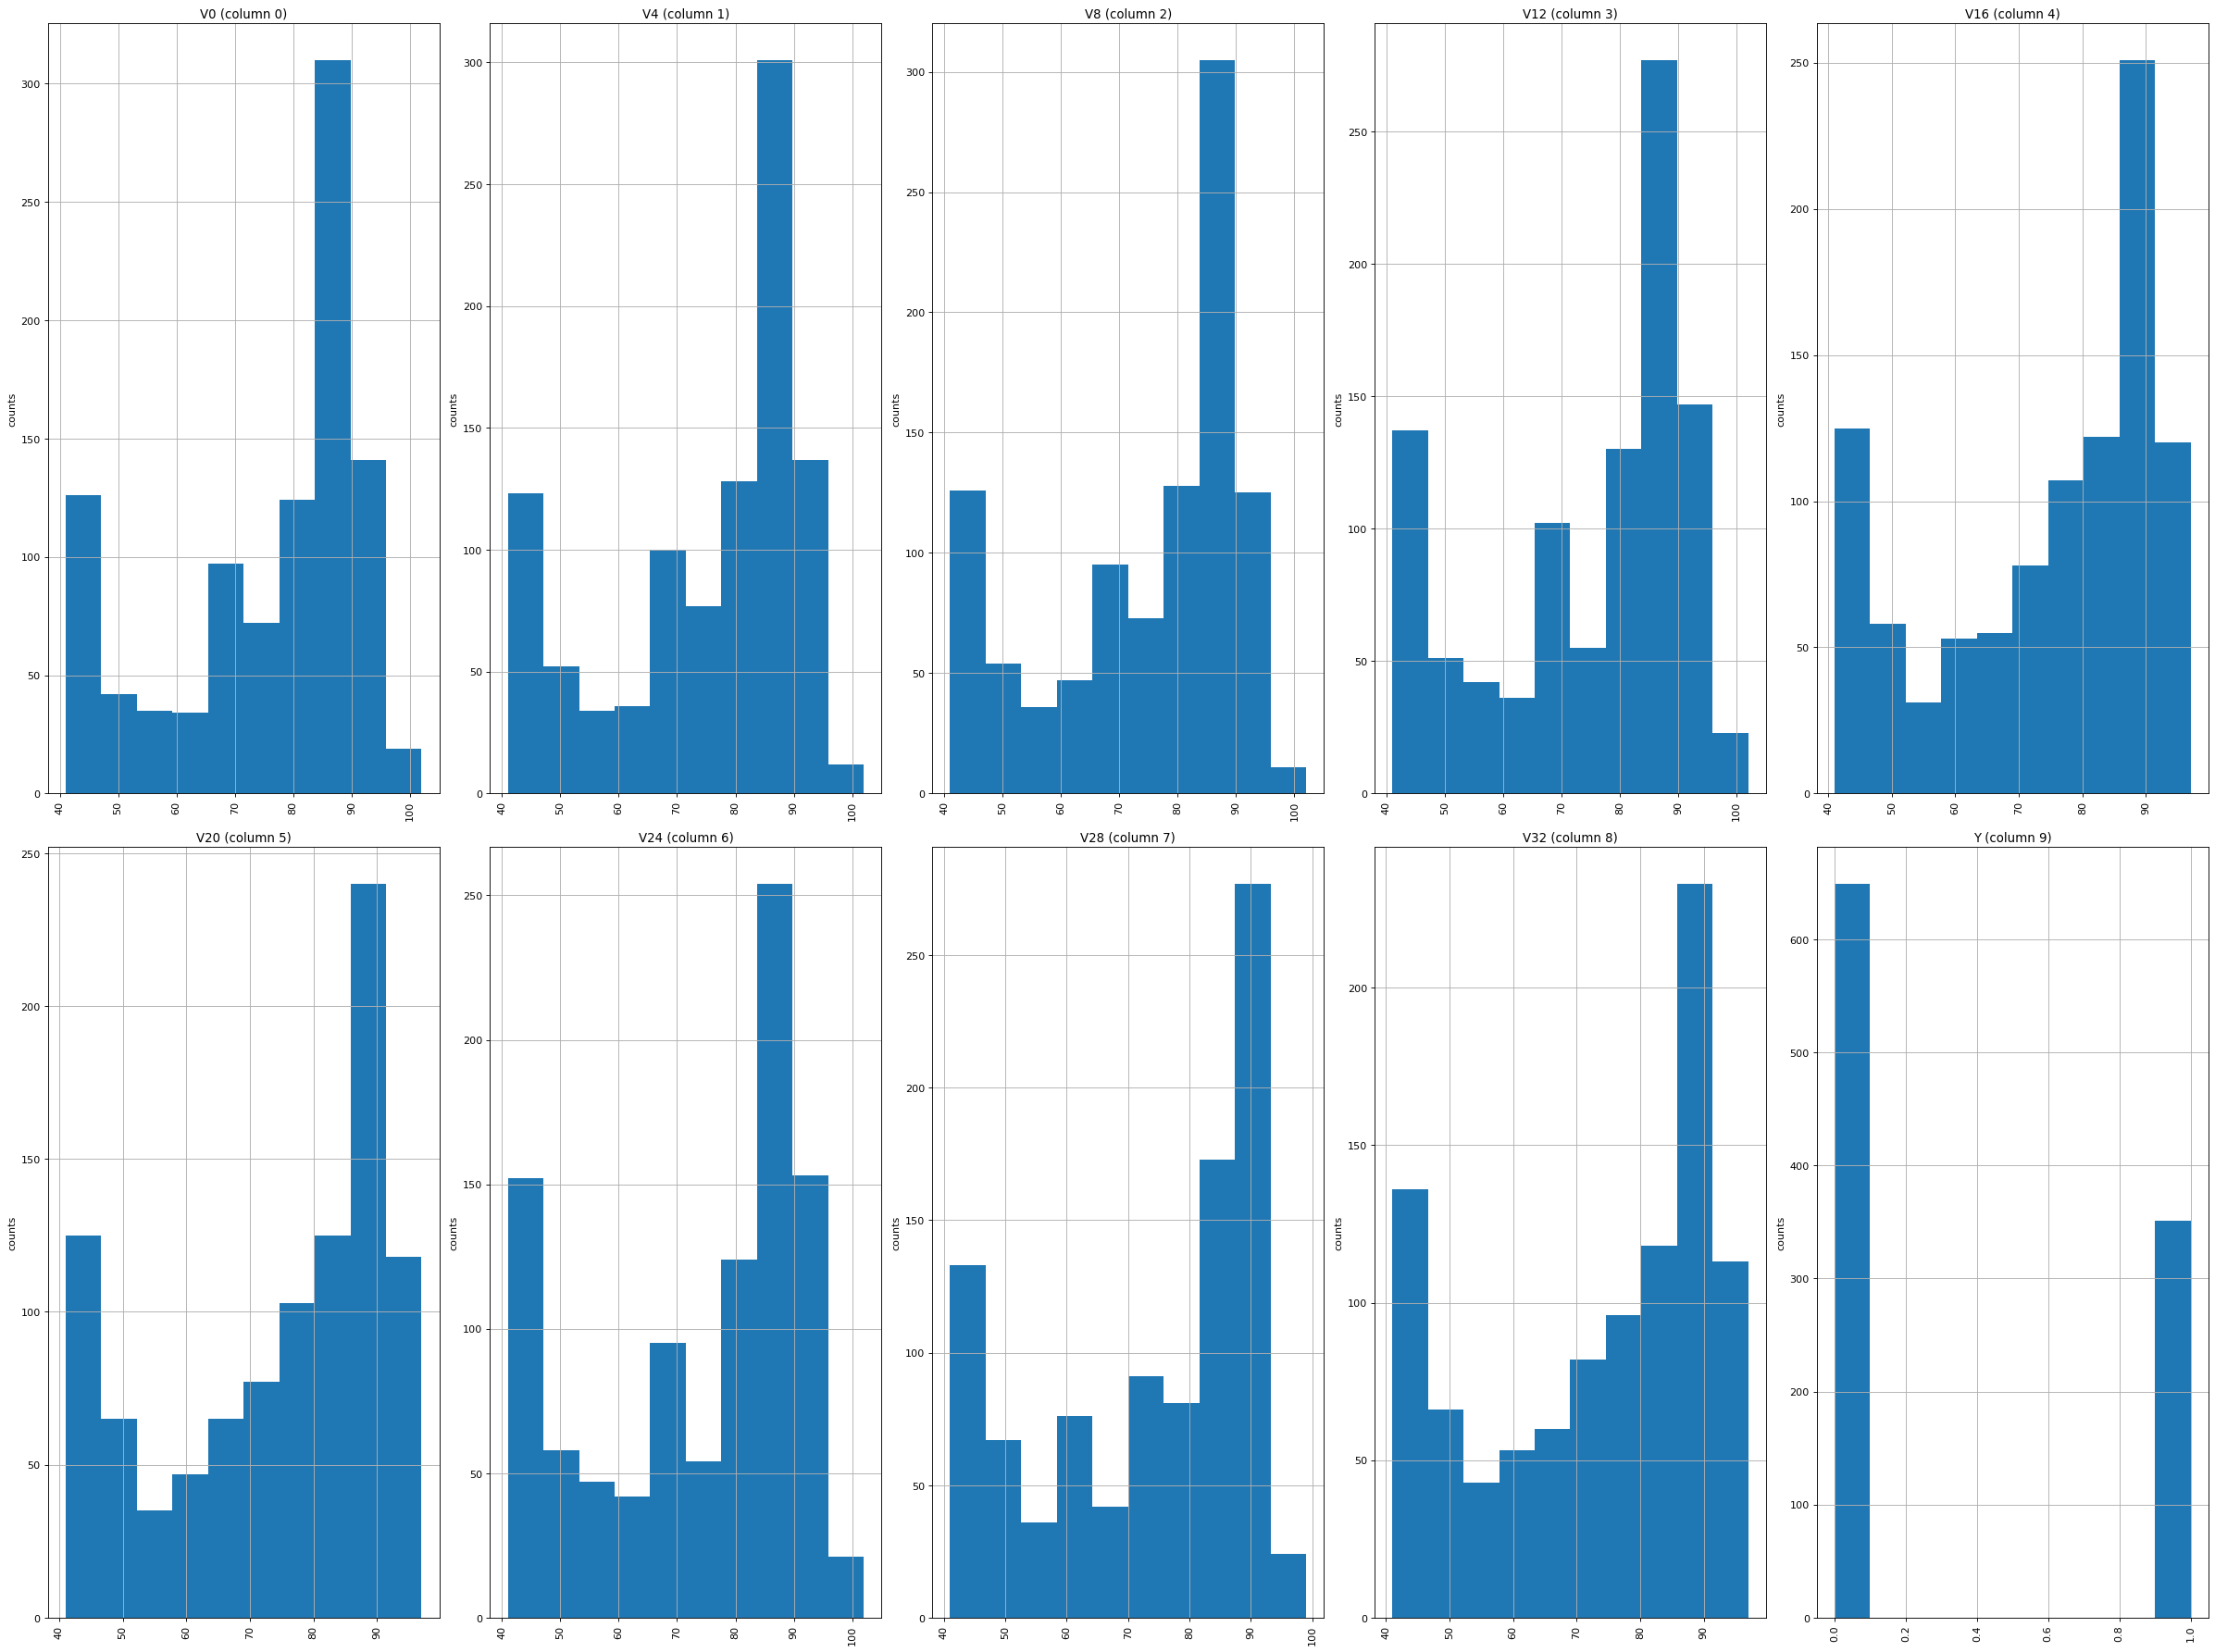

In [8]:
plotPerColumnDistribution(df1, 10, 5)

### Let's check 2nd file: /kaggle/input/satimage-2.mat.csv

In [9]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# satimage-2.mat.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/kaggle/input/satimage-2.mat.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'satimage-2.mat.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 38 columns


Let's take a quick look at what the data looks like:

In [10]:
df2.head(5)

,ID,V0,V1,V2,V3,V4,V5,V6,V7,V8,...,V27,V28,V29,V30,V31,V32,V33,V34,V35,Y
0,0,92.0,115.0,120.0,94.0,84.0,102.0,106.0,79.0,84.0,...,104.0,88.0,121.0,128.0,100.0,84.0,107.0,113.0,87.0,0.0
1,1,84.0,102.0,106.0,79.0,84.0,102.0,102.0,83.0,80.0,...,100.0,84.0,107.0,113.0,87.0,84.0,99.0,104.0,79.0,0.0
2,2,84.0,102.0,102.0,83.0,80.0,102.0,102.0,79.0,84.0,...,87.0,84.0,99.0,104.0,79.0,84.0,99.0,104.0,79.0,0.0
3,3,80.0,102.0,102.0,79.0,84.0,94.0,102.0,79.0,80.0,...,79.0,84.0,99.0,104.0,79.0,84.0,103.0,104.0,79.0,0.0
4,4,84.0,94.0,102.0,79.0,80.0,94.0,98.0,76.0,80.0,...,79.0,84.0,103.0,104.0,79.0,79.0,107.0,109.0,87.0,0.0


Distribution graphs (histogram/bar graph) of sampled columns:

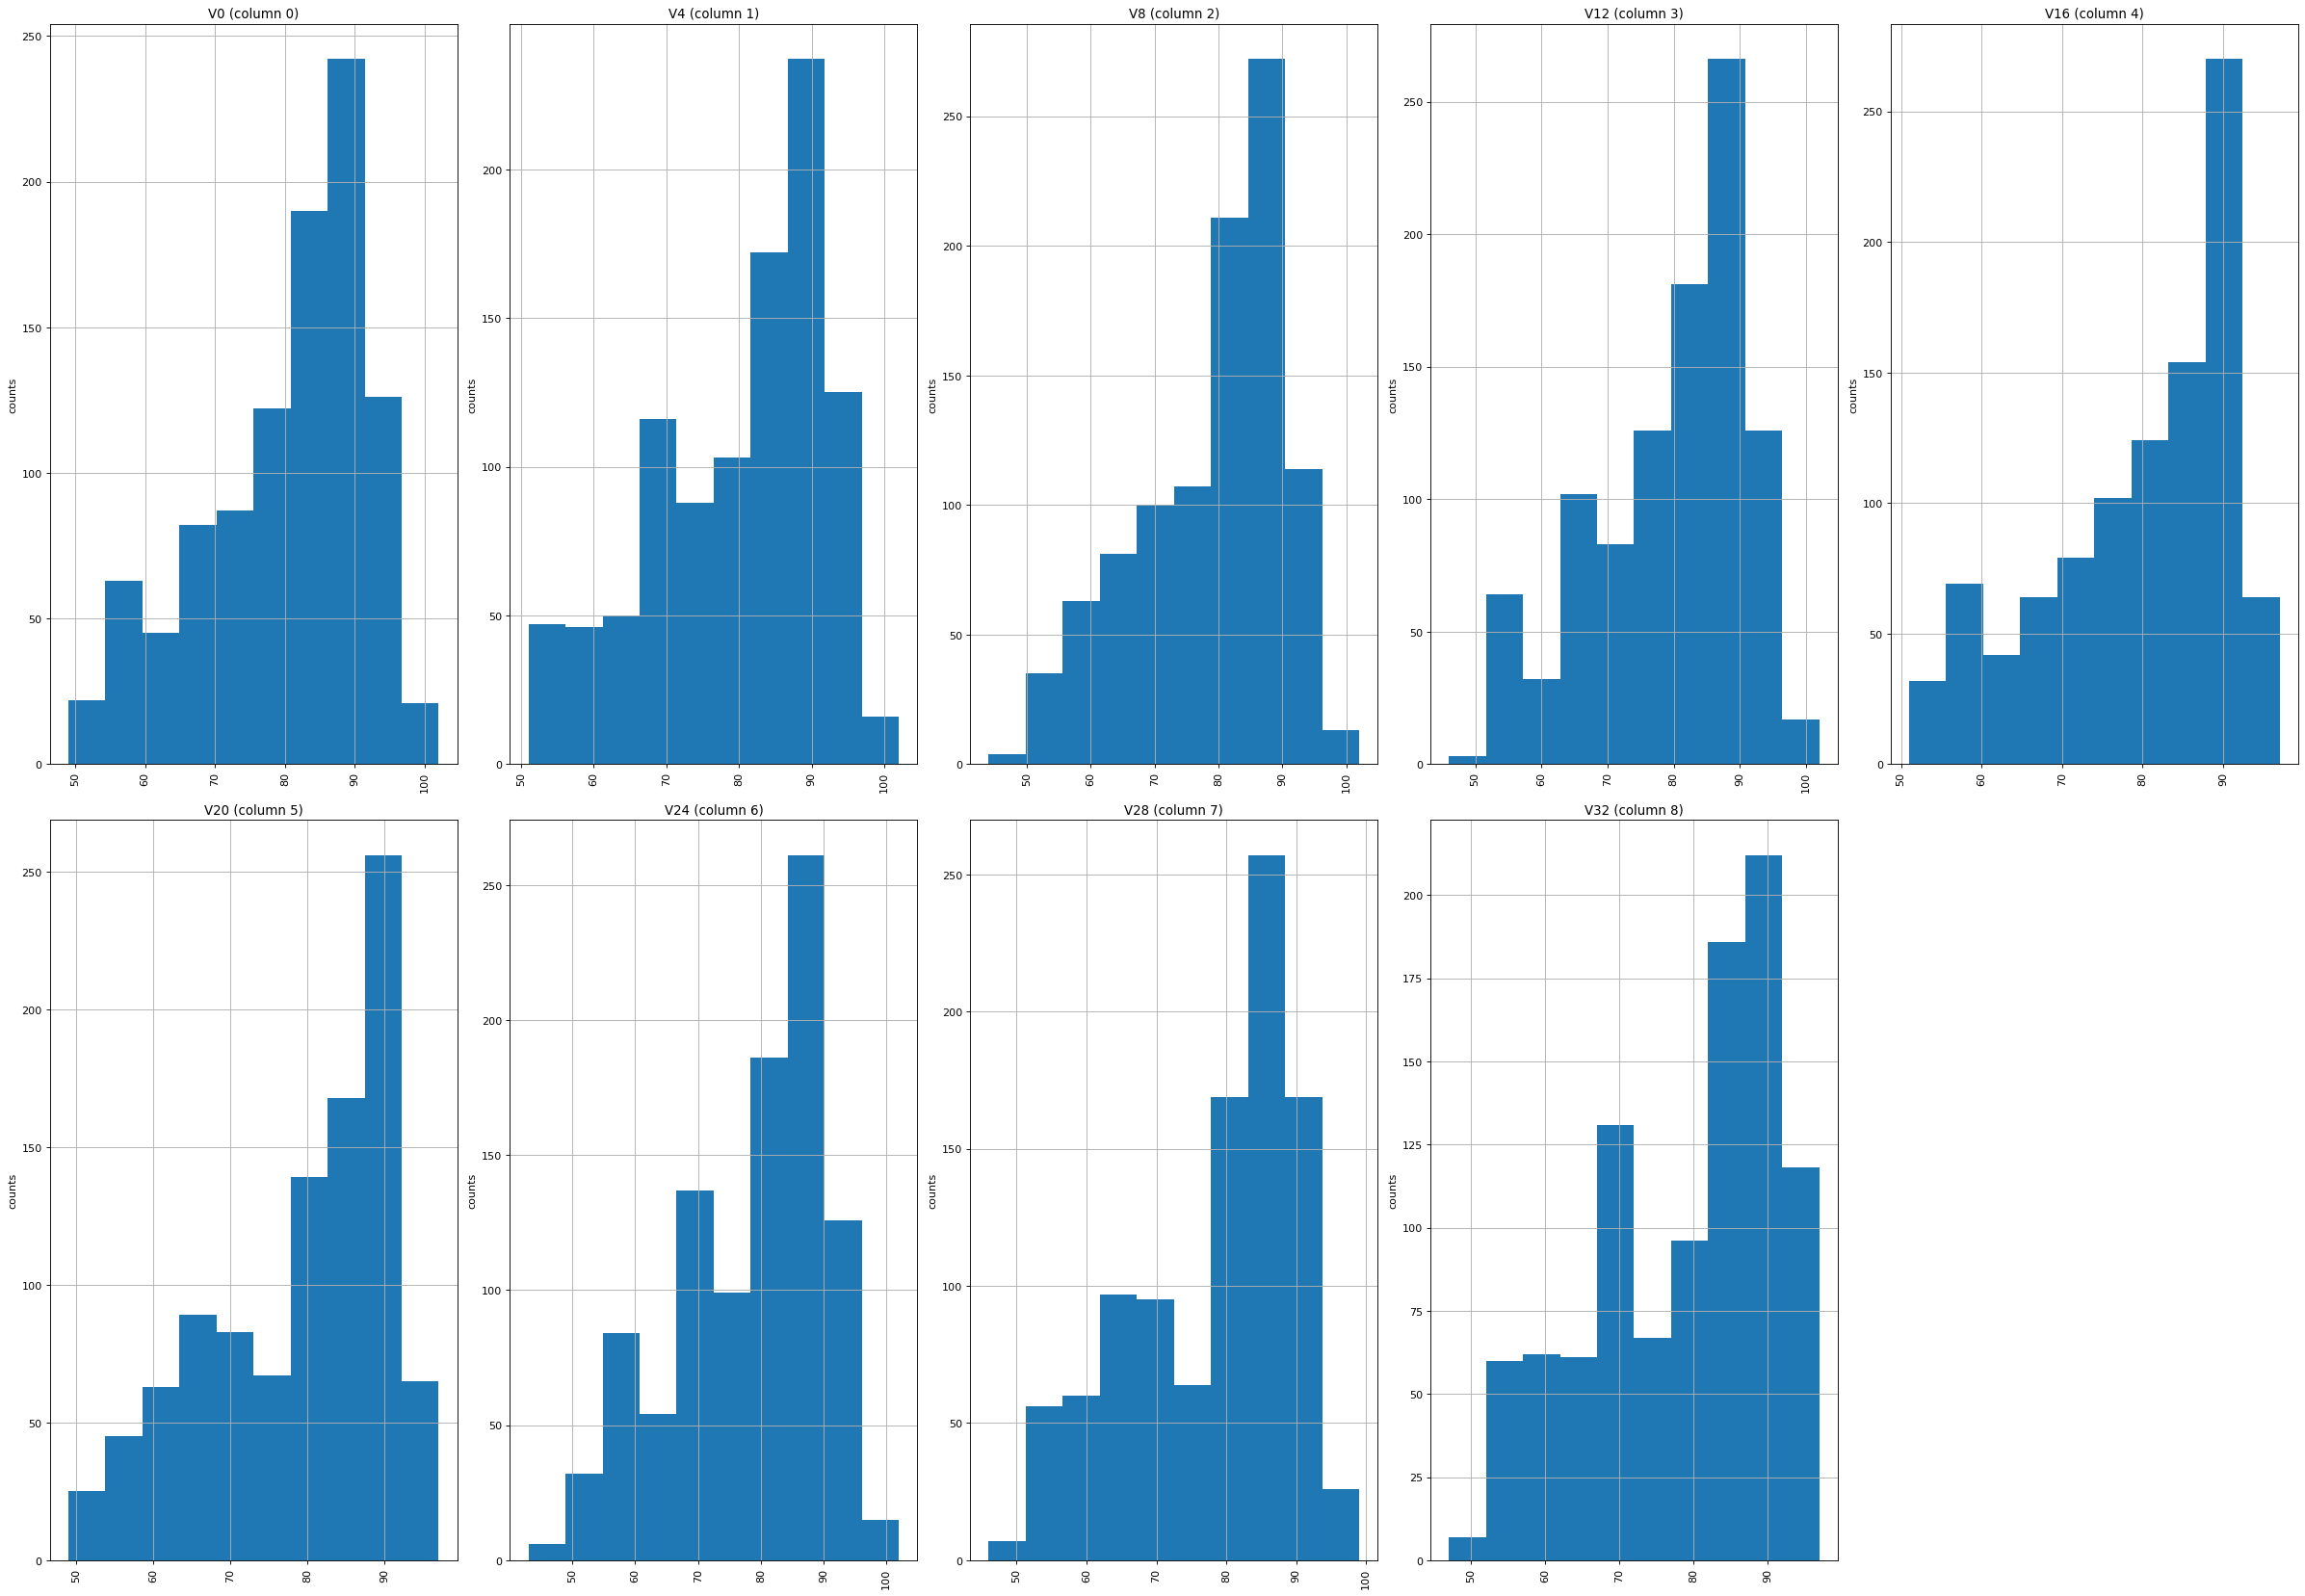

In [11]:
plotPerColumnDistribution(df2, 10, 5)